In [1]:
import sys

In [6]:
sys.path.append('/Users/simon/git/pymzm')

In [11]:
from ms2_matching import MZMLFile,load_picked_boxes

In [10]:
mz_file_obj = MZMLFile('/Users/simon/TempStuff/lipid_files/24_pp_s3_pos_1.mzML')

Loaded 1968 scans


In [36]:
boxes = load_picked_boxes('/Users/simon/TempStuff/lipid_files/24_pp_s3_pos_1.csv')

In [108]:
%load_ext autoreload
%autoreload 2
from chromatograms import add_chromatograms_to_boxes
add_chromatograms_to_boxes(boxes,mz_file_obj)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


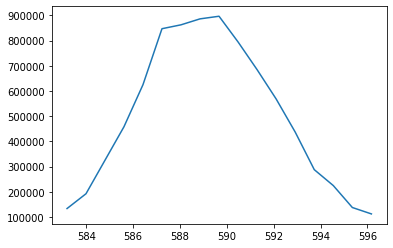

In [110]:
import pylab as plt
%matplotlib inline
boxes[203].peak_chromatogram.plot()

In [78]:
print(boxes[48].rt_range_in_seconds)
print(boxes[48].peak_chromatogram.rt_list[-1])

[497.7474, 503.5242]
1343.358


In [83]:
print(boxes[0].peak_chromatogram)
print(boxes[25].peak_chromatogram)

In [92]:
print(len(boxes[1].peak_chromatogram.rt_list))
print(len(boxes[2].peak_chromatogram.rt_list))
boxes[2].peak_chromatogram.add_point(1,2,3,4)
print(len(boxes[1].peak_chromatogram.rt_list))
print(len(boxes[2].peak_chromatogram.rt_list))



10671
10671
10672
10672


In [102]:
1 in [2,3,4]

False

In [103]:
[2,3,4].index(1)

ValueError: 1 is not in list

In [105]:
try:
    [2,3,4].index(1)
except:
    print("missing")

missing


In [122]:
boxes[3].peak_chromatogram.correlation(boxes[207].peak_chromatogram)

0.0

In [142]:
import numpy as np
correlations = {box:{} for box in boxes}
for i,box in enumerate(boxes[:-1]):
    for j,box2 in enumerate(boxes[i+1:]):
        c = box.peak_chromatogram.correlation(box2.peak_chromatogram)
        if c > 0:
            correlations[box][box2] = c
            correlations[box2][box] = c

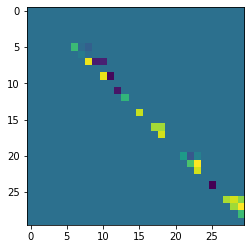

In [141]:
plt.imshow(correlations[:30,:30])

In [218]:
from chromatograms import cluster_box_chromatograms
groups,correlations = cluster_box_chromatograms(boxes,threshold = 0.8,max_mz_diff = 10)

In [219]:
print(len(groups))

724


In [220]:
big = list(filter(lambda x: len(x) > 5,groups))
print(len(big))
group = big[9]
plt.figure(figsize=(10,6))
for box in group:
    plt.plot(box.peak_chromatogram.rt_list,box.peak_chromatogram.intensity_list)


1


IndexError: list index out of range

In [221]:
print(dir(boxes[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'area', 'find_ms2_scans', 'height', 'ms2_scans', 'mz', 'mz_range', 'peak_chromatogram', 'peak_id', 'rt', 'rt_in_minutes', 'rt_in_seconds', 'rt_range', 'rt_range_in_seconds']


In [222]:
ff = list(filter(lambda x: x.mz > 758.56 and x.mz < 758.58,boxes))[0]
print(ff.height)

25186134.0


In [223]:
for g in groups:
    if ff in g:
        break

In [224]:
box = ff
group = list(g)
group.sort(key = lambda x: x.mz)
for b in group:
    print(b.mz)

758.5677490234375
759.5711059570312
760.5740661621094
761.576904296875


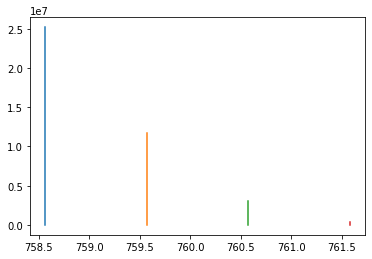

In [225]:
plt.figure(figsize=(6,4))
for b in group:
    plt.plot([b.mz,b.mz],[0,b.height])